In [2]:
# Multiple linear regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv('./data/loan_data.csv')

In [11]:
data.head()
# data.drop(columns=["year", "month"], axis=1, inplace=True)

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [12]:
# check null value
data.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

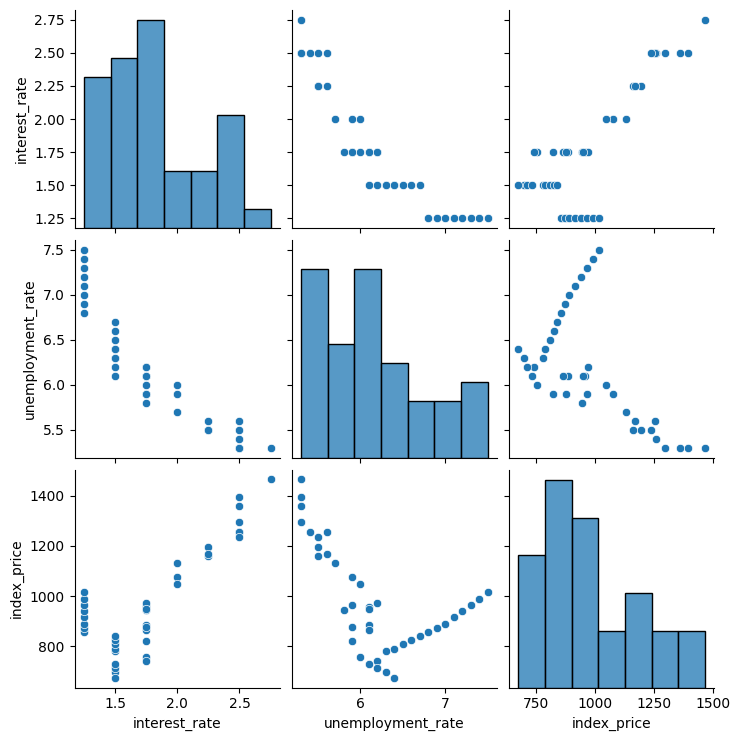

In [15]:
# lets  do some visualization
import seaborn as sns
sns.pairplot(data)
plt.show()

In [16]:
data.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.911497,0.822299
unemployment_rate,-0.911497,1.000000,-0.578702
index_price,0.822299,-0.578702,1.000000


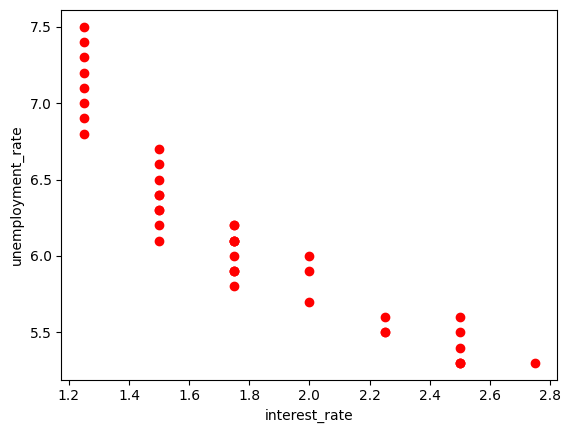

In [19]:
plt.scatter(data['interest_rate'], data['unemployment_rate'], color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')
plt.show()

In [21]:
# get the dpendent and independeent columns
X = data.iloc[:, :-1]  # first : for all the row and : for columns
y = data.iloc[:, -1]

In [42]:
# train test split
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.25, random_state=42)

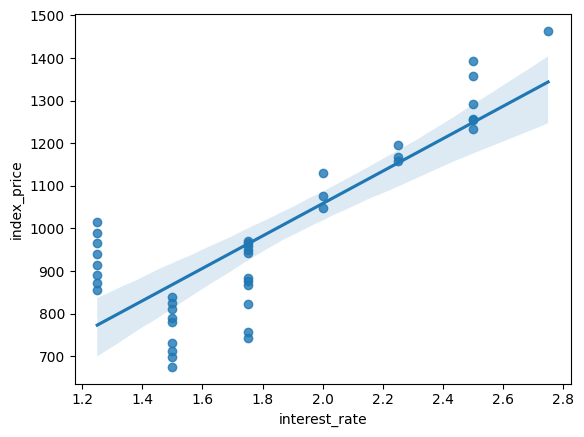

In [30]:
sns.regplot(x=data['interest_rate'], y=data['index_price'])
plt.show()

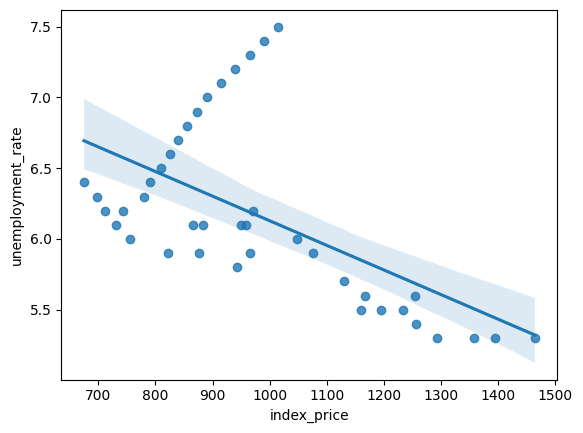

In [33]:
sns.regplot(x=data['index_price'], y=data['unemployment_rate'])
plt.show()

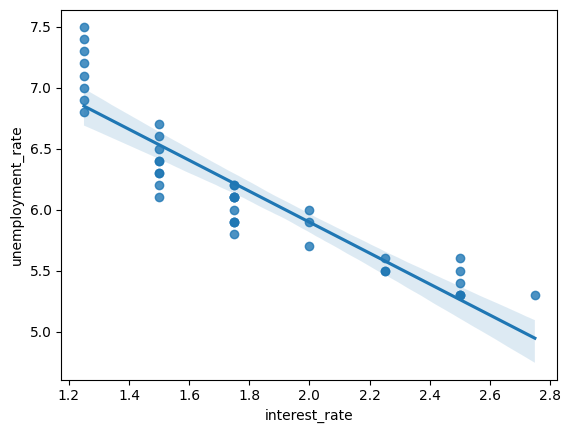

In [32]:
sns.regplot(x=data['interest_rate'], y=data['unemployment_rate'])
plt.show()

In [39]:
# standardization the test data
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# here we doing the cross validation

from sklearn.model_selection import cross_val_score
cross_val_sc = cross_val_score(regression, 
                               X_train, 
                               y_train, 
                               scoring='neg_mean_squared_error',
                               cv=3
                               )


# এখানে ক্রস ভ্যালিডেশন করার উদ্দেশ্য হল আমি cv=3 অর্থাৎ আমি আমার ট্রেনিং ডেটাসেটকে ৩ ভাগে ভাগ কোরে একবার প্রমভাগকে টেস্ট সেট বানাব এবং mse পাব। আবার পরেরবার ২য় সেটকে টেস্ট সেট বানাব এবং  mse পাব। পরেরবার পরেরভাগের জন্য mse পাব আর এভাবে আমরা মোস্ট একুরেট মডেল বাছাই করতে পারব।

In [46]:
np.mean(cross_val_sc)

np.float64(-72816.49899865588)

In [47]:
y_pred = regression.predict(X_test)

In [48]:
y_pred

array([1064.05448904,  891.01948807, 1125.33236378,  891.01948807,
        904.24636417,  928.27186349,  805.71611402,  768.46373861,
       1434.1499903 ,  680.73211169, 1335.61974016, 1026.80211363,
       1223.86261392,  829.74161334,  816.51473725, 1223.86261392,
        866.99398875,  880.22086484, 1223.86261392,  842.96848943,
        928.27186349,  731.2113632 ,  952.29736281,  853.76711266,
        891.01948807,  816.51473725, 1088.07998837,  779.26236184,
        755.23686252,  917.47324026])

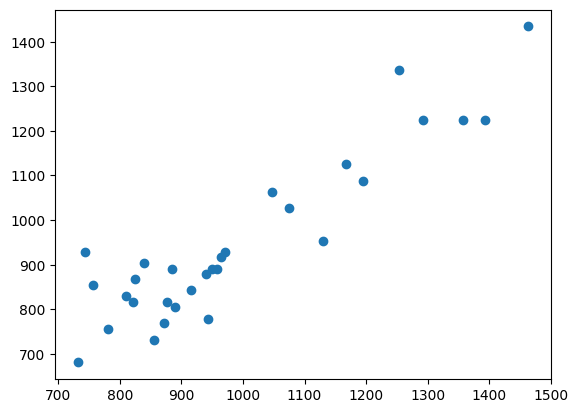

In [49]:
plt.scatter(y_test, y_pred)

In [54]:
regression.predict([[2.75,5.3]])

e:\ML-Bootcamp-Practical\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1434.1499903])